.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

In [1]:
import pyreadstat
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
def call_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPII_20230828/'
    file_path = path+'2. SPSS/HCCP_2ndWave_Work_2nd.sav'

    df, meta = pyreadstat.read_sav(file_path)
    #columns_to_drop0 = ['W21ID2', 'W21ID3']
    #df = df.drop(columns=columns_to_drop0)
    
    gc.collect()
    return df

In [3]:
df = call_df()

nan_values = df.isna()
nan_count_per_column = nan_values.sum()
Nan_cols = []
columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
print("Columns with NaN values and count of NaN values:")
for column, count in columns_with_nan.items():
    print(f"Column '{column}' has {count} NaN value(s).")
    Nan_cols.append(column)    
    
#filtered_list = [x for x in lst_R1 if x not in Nan_cols]    
df = df.drop(columns=Nan_cols)
df

Columns with NaN values and count of NaN values:
Column 'W21Q11A2' has 2349 NaN value(s).
Column 'W21Q11B2' has 3583 NaN value(s).
Column 'W21Q15A2' has 4487 NaN value(s).
Column 'W21Q15B2' has 3978 NaN value(s).
Column 'W21Q15C2' has 3584 NaN value(s).
Column 'W21Q15D2' has 5690 NaN value(s).
Column 'W21Q15E2' has 6613 NaN value(s).
Column 'W21Q16A2' has 6895 NaN value(s).
Column 'W21Q16B2' has 9294 NaN value(s).
Column 'W21Q16C2' has 9409 NaN value(s).
Column 'W21Q16D2' has 9456 NaN value(s).
Column 'W21Q191' has 6105 NaN value(s).
Column 'W21Q192' has 6105 NaN value(s).
Column 'W21Q31A' has 1259 NaN value(s).
Column 'W21Q31B' has 8119 NaN value(s).
Column 'W21DQ041' has 1536 NaN value(s).


,W21ID1,W21IND1,W21SCALE,W21Q01A,W21Q01B,W21Q02A,W21Q02B,W21Q03A,W21Q03B,W21Q04,...,W21Q27G,W21Q28,W21Q29,W21Q301,W21Q302,W21DQ01,W21DQ02A,W21DQ02B,W21DQ03,W21DQ04
0,1.0,1.0,1.0,2002.0,2.0,2002.0,2.0,1.0,1.0,20.0,...,2.0,1.0,2.0,40.0,0.0,2.0,1975.0,11.0,2.0,5.0
1,1.0,1.0,1.0,2020.0,2.0,2020.0,2.0,1.0,1.0,20.0,...,3.0,1.0,1.0,40.0,4.0,1.0,1994.0,1.0,1.0,3.0
2,1.0,1.0,1.0,2019.0,6.0,2019.0,6.0,1.0,1.0,18.0,...,3.0,1.0,1.0,40.0,0.0,1.0,1992.0,12.0,1.0,5.0
3,1.0,1.0,1.0,2020.0,4.0,2020.0,4.0,1.0,1.0,20.0,...,3.0,1.0,1.0,40.0,0.0,1.0,1993.0,1.0,1.0,4.0
4,1.0,1.0,1.0,2020.0,2.0,2020.0,2.0,1.0,1.0,20.0,...,3.0,1.0,1.0,40.0,6.0,1.0,1993.0,8.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,7032.0,1.0,3.0,2018.0,10.0,2018.0,10.0,3.0,3.0,19.0,...,3.0,1.0,1.0,50.0,5.0,1.0,1987.0,4.0,2.0,5.0
9512,7032.0,1.0,3.0,2011.0,1.0,2011.0,1.0,1.0,1.0,9.0,...,3.0,1.0,2.0,50.0,10.0,1.0,1985.0,12.0,2.0,5.0
9513,7032.0,1.0,3.0,2005.0,9.0,2018.0,1.0,1.0,5.0,12.0,...,4.0,1.0,2.0,40.0,1.0,2.0,1976.0,8.0,1.0,5.0
9514,7032.0,1.0,3.0,2011.0,4.0,2021.0,1.0,1.0,5.0,1.0,...,2.0,1.0,2.0,40.0,3.0,1.0,1981.0,3.0,2.0,5.0


# Heatmap correlation Analysis

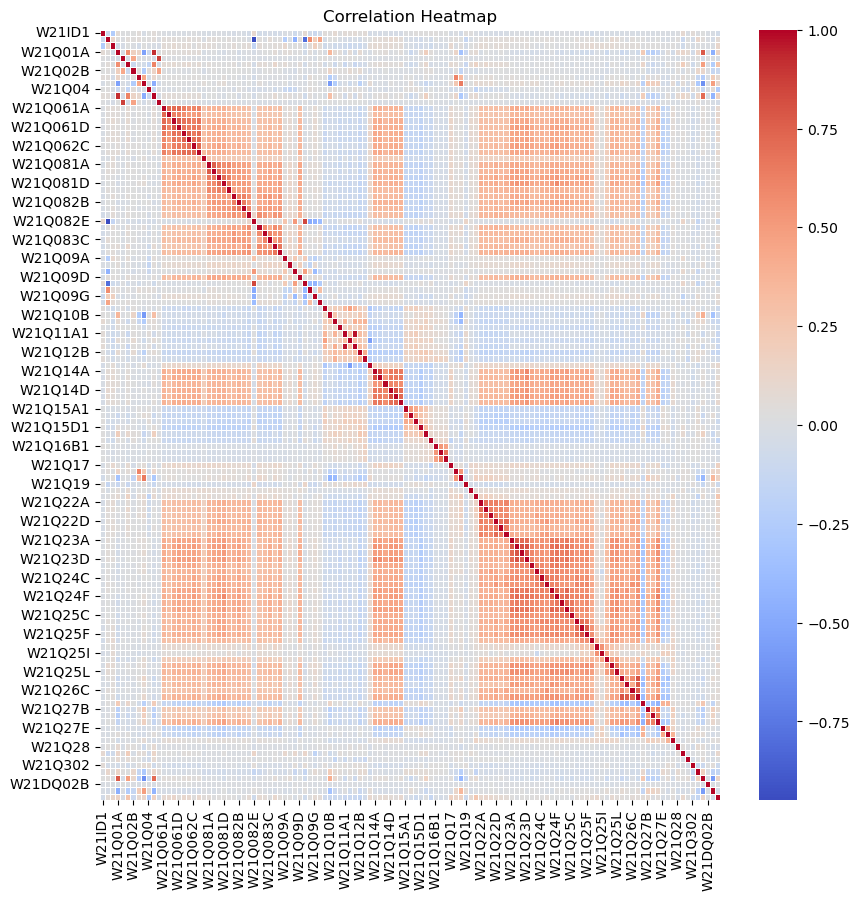

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

corr_matrix = df_normalized.corr() #Pearson correlation coefficient

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Probability Density Function Vis.

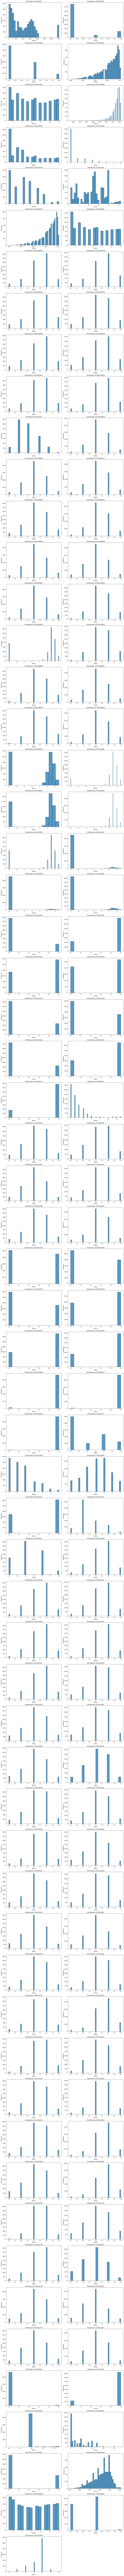

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(df.columns)

num_rows = (num_cols // 2) + (num_cols % 2)
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))

ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], kde=False, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel('Values')
    ax[i].set_ylabel('Frequency')

if num_cols % 2 != 0:
    ax[-1].axis('off')

plt.tight_layout()
plt.show()

썰 풀때 Head 에서 창출할 수 있는 정보와 Work에서 창출할 수 있는 정보를 비교해야 함

Head => feature 